In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Tải và đọc dữ liệu
!gdown 1x8SWX93sFcsKSvDjfknuM3HieMq5ZUO5
data = pd.read_csv("my_xxxx.csv")

Downloading...
From: https://drive.google.com/uc?id=1x8SWX93sFcsKSvDjfknuM3HieMq5ZUO5
To: d:\GitHub\AIO_Module_IV\my_xxxx.csv

  0%|          | 0.00/12.4k [00:00<?, ?B/s]
100%|██████████| 12.4k/12.4k [00:00<00:00, 12.4MB/s]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  350 non-null    int64 
 1   Gender              350 non-null    object
 2   Experience (Years)  350 non-null    int64 
 3   Position            350 non-null    object
 4   Salary              350 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.8+ KB


In [4]:
# 2. Label Encoding
# Chuyển đổi các cột dữ liệu dạng chữ (có thể là cột "Gender" và "Position") sang dạng số
# bằng cách sử dụng LabelEncoder từ thư viện sklearn

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Tạo bản sao để không thay đổi dữ liệu gốc
df = data.copy()

# Encode cột Gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode cột Position
df['Position'] = label_encoder.fit_transform(df['Position'])

print("Dữ liệu sau khi encode:")
print(df.head())
print("\nKiểu dữ liệu sau encode:")
print(df.dtypes)


Dữ liệu sau khi encode:
   ID  Gender  Experience (Years)  Position  Salary
0   1       0                   4         2  109976
1   2       1                   6         2  120088
2   3       1                  17        10  181301
3   4       1                   7         8   77530
4   5       0                  13         8  152397

Kiểu dữ liệu sau encode:
ID                    int64
Gender                int32
Experience (Years)    int64
Position              int32
Salary                int64
dtype: object


In [5]:
# 3. Tách dữ liệu thành danh sách các feature (X) và nhãn (y)

# Sử dụng các cột "Gender", "Experience (Years)" và "Position" làm đặc trưng đầu vào X
X = df[['Gender', 'Experience (Years)', 'Position']]

# Sử dụng cột "Salary" làm nhãn y
y = df['Salary']

print("Features (X):")
print(X.head())
print(f"\nShape của X: {X.shape}")

print("\nTarget (y):")
print(y.head())
print(f"Shape của y: {y.shape}")


Features (X):
   Gender  Experience (Years)  Position
0       0                   4         2
1       1                   6         2
2       1                  17        10
3       1                   7         8
4       0                  13         8

Shape của X: (350, 3)

Target (y):
0    109976
1    120088
2    181301
3     77530
4    152397
Name: Salary, dtype: int64
Shape của y: (350,)


In [6]:
# 4. Tách tập dữ liệu thành tập huấn luyện và kiểm tra

# Chia dữ liệu thành tập huấn luyện (X_train, y_train) và tập kiểm tra (X_test, y_test) 
# với tỷ lệ 80:20
# Đảm bảo rằng việc chia tách dữ liệu là ngẫu nhiên với random_state=42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% cho test set, 80% cho train set
    random_state=42  # Đảm bảo kết quả có thể tái lặp
)

print("Kích thước tập huấn luyện:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nKích thước tập kiểm tra:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTỷ lệ chia: Train {len(X_train)/len(X)*100:.1f}% - Test {len(X_test)/len(X)*100:.1f}%")


Kích thước tập huấn luyện:
X_train: (280, 3)
y_train: (280,)

Kích thước tập kiểm tra:
X_test: (70, 3)
y_test: (70,)

Tỷ lệ chia: Train 80.0% - Test 20.0%


In [7]:
# 5. Huấn luyện mô hình Random Forest và tính toán MSE và R²

# Tạo mô hình Random Forest với các tham số yêu cầu
rf_model = RandomForestRegressor(
    n_estimators=50,    # Số cây trong forest
    random_state=42     # Đảm bảo kết quả có thể tái lặp
)

# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính toán MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Tính toán R² (R-squared)
r2 = r2_score(y_test, y_pred)

print("Kết quả đánh giá mô hình Random Forest:")
print("="*40)
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (R-squared): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {mse**0.5:.4f}")


Kết quả đánh giá mô hình Random Forest:
MSE (Mean Squared Error): 981772731.6793
R² (R-squared): 0.3121
RMSE (Root Mean Squared Error): 31333.2528


In [8]:
# 5. Huấn luyện mô hình Random Forest và tính toán MSE và R²

loop_list = [10, 20, 50, 100]

for n_estimators in loop_list:
    # Tạo mô hình Random Forest với các tham số yêu cầu
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,    # Số cây trong forest
        random_state=42     # Đảm bảo kết quả có thể tái lặp
    )

    # Huấn luyện mô hình trên tập train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)

    # Tính toán MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    # Tính toán R² (R-squared)
    r2 = r2_score(y_test, y_pred)

    print("="*40)
    print(f"Kết quả đánh giá mô hình Random Forest với {n_estimators} cây:")
    print(f"MSE (Mean Squared Error): {mse:.4f}")
    print(f"R² (R-squared): {r2:.4f}")


Kết quả đánh giá mô hình Random Forest với 10 cây:
MSE (Mean Squared Error): 1120987367.6711
R² (R-squared): 0.2145
Kết quả đánh giá mô hình Random Forest với 20 cây:
MSE (Mean Squared Error): 972381168.1178
R² (R-squared): 0.3187
Kết quả đánh giá mô hình Random Forest với 50 cây:
MSE (Mean Squared Error): 981772731.6793
R² (R-squared): 0.3121
Kết quả đánh giá mô hình Random Forest với 100 cây:
MSE (Mean Squared Error): 1008555152.7152
R² (R-squared): 0.2933


In [9]:
import numpy as np

# Thử nghiệm các giá trị max_depth từ 1 đến 10
depth_list = np.arange(1, 11, 1)

# Lưu trữ kết quả để so sánh
results = []
best_mse = float('inf')
best_depth = None

for max_depth in depth_list:
    # Tạo mô hình Random Forest với max_depth thay đổi
    rf_model = RandomForestRegressor(
        n_estimators=50,        # Giữ nguyên số cây như yêu cầu trước
        max_depth=max_depth,    # Thay đổi độ sâu tối đa
        random_state=42         # Đảm bảo kết quả có thể tái lặp
    )

    # Huấn luyện mô hình trên tập train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)

    # Tính toán MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    # Tính toán R² (R-squared)
    r2 = r2_score(y_test, y_pred)
    
    # Lưu kết quả
    results.append({
        'max_depth': max_depth,
        'mse': mse,
        'r2': r2
    })
    
    # Cập nhật MSE tốt nhất
    if mse < best_mse:
        best_mse = mse
        best_depth = max_depth

    print(f"max_depth={max_depth:2d} | MSE: {mse:10.4f} | R²: {r2:.4f}")

print("="*60)
print(f"KẾT QUẢ TỐT NHẤT:")
print(f"Độ sâu tối ưu (max_depth): {best_depth}")
print(f"MSE nhỏ nhất: {best_mse:.4f}")

# Hiển thị bảng tóm tắt
print("\nBảng tóm tắt kết quả:")
print("max_depth |    MSE     |   R²")
print("-"*30)
for result in results:
    marker = " ← BEST" if result['max_depth'] == best_depth else ""
    print(f"    {result['max_depth']:2d}    | {result['mse']:8.4f} | {result['r2']:6.4f}{marker}")


max_depth= 1 | MSE: 1092850184.1442 | R²: 0.2342
max_depth= 2 | MSE: 797741806.3699 | R²: 0.4410
max_depth= 3 | MSE: 822741167.5913 | R²: 0.4235
max_depth= 4 | MSE: 799169071.1460 | R²: 0.4400
max_depth= 5 | MSE: 809807795.7298 | R²: 0.4326
max_depth= 6 | MSE: 846607220.9039 | R²: 0.4068
max_depth= 7 | MSE: 862874897.4571 | R²: 0.3954
max_depth= 8 | MSE: 909640269.1317 | R²: 0.3626
max_depth= 9 | MSE: 948740043.4976 | R²: 0.3352
max_depth=10 | MSE: 969892855.1640 | R²: 0.3204
KẾT QUẢ TỐT NHẤT:
Độ sâu tối ưu (max_depth): 2
MSE nhỏ nhất: 797741806.3699

Bảng tóm tắt kết quả:
max_depth |    MSE     |   R²
------------------------------
     1    | 1092850184.1442 | 0.2342
     2    | 797741806.3699 | 0.4410 ← BEST
     3    | 822741167.5913 | 0.4235
     4    | 799169071.1460 | 0.4400
     5    | 809807795.7298 | 0.4326
     6    | 846607220.9039 | 0.4068
     7    | 862874897.4571 | 0.3954
     8    | 909640269.1317 | 0.3626
     9    | 948740043.4976 | 0.3352
    10    | 969892855.1640 

Tầm quan trọng của các đặc trưng (Gradient Boosting):
Experience (Years)  : 0.5770 (57.70%)
Position            : 0.4099 (40.99%)
Gender              : 0.0131 (1.31%)

Đặc trưng quan trọng nhất: Experience (Years)
Mức độ quan trọng: 0.5770


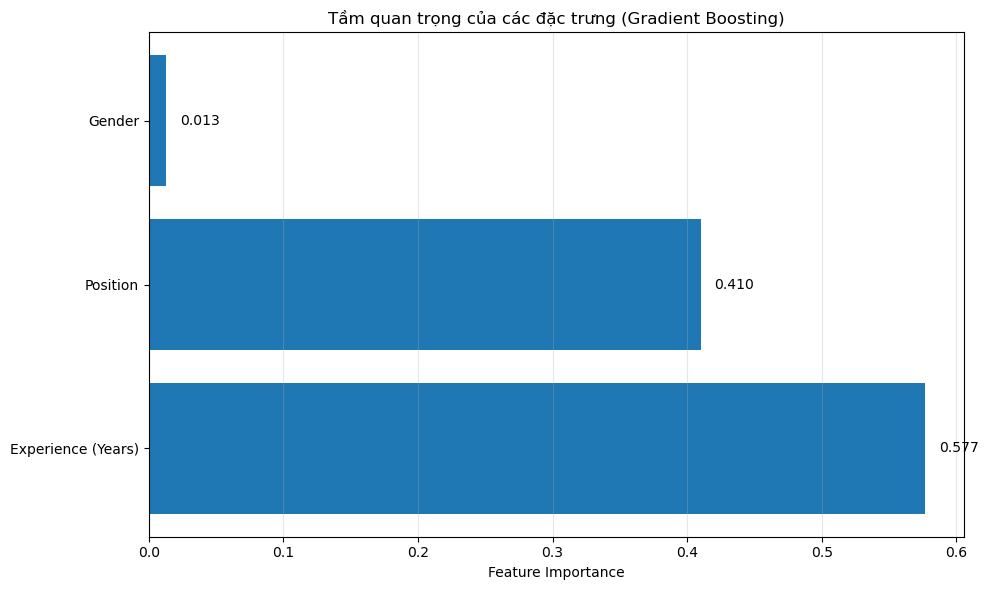


So sánh với Random Forest:
           Feature  RF_Importance  GB_Importance
Experience (Years)         0.5857         0.5770
          Position         0.3718         0.4099
            Gender         0.0425         0.0131


In [10]:
# Đánh giá tầm quan trọng của các đặc trưng bằng Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Tạo mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    random_state=42
)

# Huấn luyện mô hình
gb_model.fit(X_train, y_train)

# Lấy tầm quan trọng của các đặc trưng
feature_importances = gb_model.feature_importances_

# Tên các đặc trưng
feature_names = ['Gender', 'Experience (Years)', 'Position']

# Tạo DataFrame để dễ xem
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("Tầm quan trọng của các đặc trưng (Gradient Boosting):")
print("="*50)
for i, row in importance_df.iterrows():
    print(f"{row['Feature']:20s}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

print(f"\nĐặc trưng quan trọng nhất: {importance_df.iloc[0]['Feature']}")
print(f"Mức độ quan trọng: {importance_df.iloc[0]['Importance']:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Tầm quan trọng của các đặc trưng (Gradient Boosting)')
plt.grid(axis='x', alpha=0.3)

# Thêm giá trị trên mỗi thanh
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# So sánh với Random Forest để tham khảo
print("\n" + "="*50)
print("So sánh với Random Forest:")

rf_comparison = RandomForestRegressor(n_estimators=50, random_state=42)
rf_comparison.fit(X_train, y_train)

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': rf_comparison.feature_importances_,
    'GB_Importance': feature_importances
}).sort_values('GB_Importance', ascending=False)

print(rf_importance_df.to_string(index=False, float_format='%.4f'))

So sánh hiệu suất AdaBoost vs Gradient Boosting
1. ADABOOST REGRESSOR:
------------------------------
AdaBoost MSE: 822155975.0927
AdaBoost R²:  0.4239

2. GRADIENT BOOSTING REGRESSOR:
------------------------------
Gradient Boosting MSE: 797328906.1114
Gradient Boosting R²:  0.4413

3. SO SÁNH KẾT QUẢ:
            Model            MSE     R²
         AdaBoost 822155975.0927 0.4239
Gradient Boosting 797328906.1114 0.4413

Mô hình có MSE thấp hơn: Gradient Boosting
Mô hình có R² cao hơn: Gradient Boosting

4. PHÂN TÍCH THEO TIÊU CHÍ:

AdaBoost:
  MSE: 822155975.0927
  R²:  0.4239
  → R² = 0.424 (0.4-0.5): Mô hình ở mức tệ
  → MSE lớn

Gradient Boosting:
  MSE: 797328906.1114
  R²:  0.4413
  → R² = 0.441 (0.4-0.5): Mô hình ở mức tệ
  → MSE lớn

KẾT LUẬN:
AdaBoost thuộc nhóm: C
Gradient Boosting thuộc nhóm: C


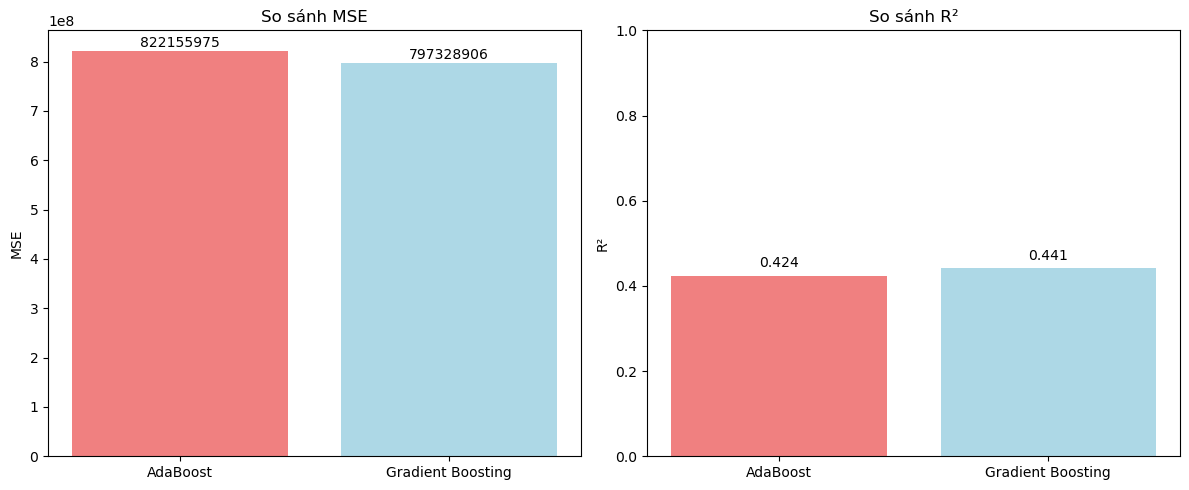

In [11]:
# So sánh hiệu suất AdaBoost và Gradient Boosting
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("So sánh hiệu suất AdaBoost vs Gradient Boosting")
print("="*60)

# 1. AdaBoost Regressor
print("1. ADABOOST REGRESSOR:")
print("-" * 30)

ada_model = AdaBoostRegressor(
    n_estimators=50,
    random_state=42
)

# Huấn luyện AdaBoost
ada_model.fit(X_train, y_train)

# Dự đoán AdaBoost
ada_pred = ada_model.predict(X_test)

# Tính metrics cho AdaBoost
ada_mse = mean_squared_error(y_test, ada_pred)
ada_r2 = r2_score(y_test, ada_pred)

print(f"AdaBoost MSE: {ada_mse:.4f}")
print(f"AdaBoost R²:  {ada_r2:.4f}")

# 2. Gradient Boosting Regressor
print("\n2. GRADIENT BOOSTING REGRESSOR:")
print("-" * 30)

gb_model = GradientBoostingRegressor(
    n_estimators=50,
    random_state=42
)

# Huấn luyện Gradient Boosting
gb_model.fit(X_train, y_train)

# Dự đoán Gradient Boosting
gb_pred = gb_model.predict(X_test)

# Tính metrics cho Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting MSE: {gb_mse:.4f}")
print(f"Gradient Boosting R²:  {gb_r2:.4f}")

# 3. So sánh kết quả
print("\n3. SO SÁNH KẾT QUẢ:")
print("="*60)

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting'],
    'MSE': [ada_mse, gb_mse],
    'R²': [ada_r2, gb_r2]
})

print(comparison_df.to_string(index=False, float_format='%.4f'))

# Xác định mô hình tốt hơn
print(f"\nMô hình có MSE thấp hơn: {'AdaBoost' if ada_mse < gb_mse else 'Gradient Boosting'}")
print(f"Mô hình có R² cao hơn: {'AdaBoost' if ada_r2 > gb_r2 else 'Gradient Boosting'}")

# 4. Phân tích kết quả theo tiêu chí đề bài
print("\n4. PHÂN TÍCH THEO TIÊU CHÍ:")
print("="*60)

def analyze_performance(mse, r2, model_name):
    print(f"\n{model_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²:  {r2:.4f}")
    
    if r2 >= 0.7:
        print(f"  → R² = {r2:.3f} (≥0.7): Mô hình hoạt động khá tốt")
        print(f"  → MSE tương đối {'thấp' if mse < 1000000 else 'cao'}")
        category = "A"
    elif r2 >= 0.6:
        print(f"  → R² = {r2:.3f} (0.6-0.7): Mô hình ở mức khá, còn nhiều sai sót")
        print(f"  → MSE khá cao")
        category = "B"
    elif r2 >= 0.4:
        print(f"  → R² = {r2:.3f} (0.4-0.5): Mô hình ở mức tệ")
        print(f"  → MSE lớn")
        category = "C"
    else:
        print(f"  → R² = {r2:.3f} (≤0.2): Mô hình không học được gì")
        print(f"  → MSE siêu lớn")
        category = "D"
    
    return category

ada_category = analyze_performance(ada_mse, ada_r2, "AdaBoost")
gb_category = analyze_performance(gb_mse, gb_r2, "Gradient Boosting")

print(f"\nKẾT LUẬN:")
print(f"AdaBoost thuộc nhóm: {ada_category}")
print(f"Gradient Boosting thuộc nhóm: {gb_category}")

# 5. Vẽ biểu đồ so sánh (optional)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ MSE
models = ['AdaBoost', 'Gradient Boosting']
mse_values = [ada_mse, gb_mse]
ax1.bar(models, mse_values, color=['lightcoral', 'lightblue'])
ax1.set_title('So sánh MSE')
ax1.set_ylabel('MSE')
for i, v in enumerate(mse_values):
    ax1.text(i, v + max(mse_values)*0.01, f'{v:.0f}', ha='center')

# Biểu đồ R²
r2_values = [ada_r2, gb_r2]
ax2.bar(models, r2_values, color=['lightcoral', 'lightblue'])
ax2.set_title('So sánh R²')
ax2.set_ylabel('R²')
ax2.set_ylim(0, 1)
for i, v in enumerate(r2_values):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [12]:
import xgboost as xgb
from xgboost import XGBRegressor

params = {
    "n_estimators": 50,
    "random_state": 42
}
xgb_model = XGBRegressor(**params)


Phân tích đặc trưng được sử dụng nhiều nhất để phân nhánh (XGBoost)
1. FEATURE WEIGHTS (Số lần phân nhánh):
----------------------------------------
Gender              :    0 lần phân nhánh
Experience (Years)  :    0 lần phân nhánh
Position            :    0 lần phân nhánh

2. KẾT QUẢ:
----------------------------------------
Đặc trưng được sử dụng nhiều nhất: 
Số lần phân nhánh: 0
Index của đặc trưng: f-1

3. BẢNG CHI TIẾT:
--------------------------------------------------
           Feature XGBoost_Key  Weight  Percentage
            Gender          f0       0        0.00
Experience (Years)          f1       0        0.00
          Position          f2       0        0.00


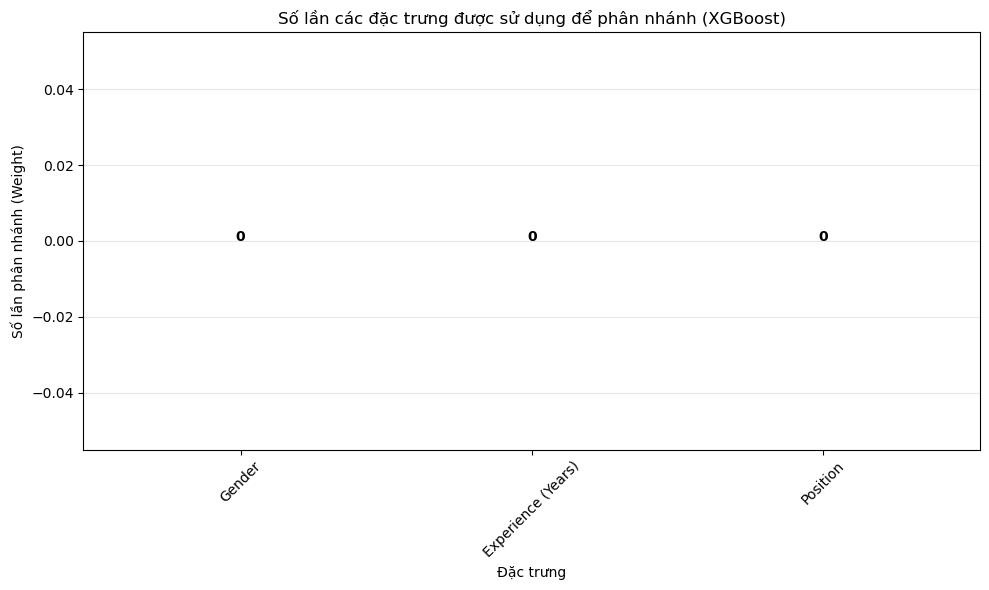


4. SO SÁNH VỚI CÁC LOẠI IMPORTANCE KHÁC:
GAIN (Độ cải thiện trung bình):
  Gender              : 0.0000
  Experience (Years)  : 0.0000
  Position            : 0.0000

COVER (Số mẫu bị ảnh hưởng):
  Gender              : 0.0000
  Experience (Years)  : 0.0000
  Position            : 0.0000

KẾT LUẬN: Đặc trưng '' được sử dụng nhiều nhất để phân nhánh với 0 lần.


In [13]:
# Tìm đặc trưng được sử dụng nhiều nhất để phân nhánh trong XGBoost
print("Phân tích đặc trưng được sử dụng nhiều nhất để phân nhánh (XGBoost)")
print("="*70)

# Huấn luyện mô hình XGBoost (nếu chưa huấn luyện)
xgb_model.fit(X_train, y_train)

# QUAN TRỌNG: Sử dụng get_booster() để truy cập Booster object
# Sau đó mới có thể sử dụng get_score() với importance_type="weight"
booster = xgb_model.get_booster()
feature_weights = booster.get_score(importance_type="weight")

print("1. FEATURE WEIGHTS (Số lần phân nhánh):")
print("-" * 40)

# Tên các đặc trưng
feature_names = ['Gender', 'Experience (Years)', 'Position']

# Hiển thị kết quả
for i, feature_name in enumerate(feature_names):
    # XGBoost sử dụng f0, f1, f2... để đại diện cho các feature
    feature_key = f"f{i}"
    weight = feature_weights.get(feature_key, 0)  # Lấy weight, nếu không có thì = 0
    print(f"{feature_name:20s}: {weight:4d} lần phân nhánh")

# Tìm đặc trưng được sử dụng nhiều nhất
max_weight = 0
most_used_feature = ""
most_used_index = -1

for i, feature_name in enumerate(feature_names):
    feature_key = f"f{i}"
    weight = feature_weights.get(feature_key, 0)
    if weight > max_weight:
        max_weight = weight
        most_used_feature = feature_name
        most_used_index = i

print("\n2. KẾT QUẢ:")
print("-" * 40)
print(f"Đặc trưng được sử dụng nhiều nhất: {most_used_feature}")
print(f"Số lần phân nhánh: {max_weight}")
print(f"Index của đặc trưng: f{most_used_index}")

# Tạo DataFrame để dễ nhìn và sắp xếp
import pandas as pd

weights_data = []
for i, feature_name in enumerate(feature_names):
    feature_key = f"f{i}"
    weight = feature_weights.get(feature_key, 0)
    weights_data.append({
        'Feature': feature_name,
        'XGBoost_Key': feature_key,
        'Weight': weight,
        'Percentage': (weight / sum(feature_weights.values()) * 100) if sum(feature_weights.values()) > 0 else 0
    })

weights_df = pd.DataFrame(weights_data).sort_values('Weight', ascending=False)

print(f"\n3. BẢNG CHI TIẾT:")
print("-" * 50)
print(weights_df.to_string(index=False, float_format='%.2f'))

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(weights_df['Feature'], weights_df['Weight'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Số lần các đặc trưng được sử dụng để phân nhánh (XGBoost)', fontsize=12)
plt.xlabel('Đặc trưng')
plt.ylabel('Số lần phân nhánh (Weight)')
plt.xticks(rotation=45)

# Thêm giá trị trên mỗi thanh
for i, v in enumerate(weights_df['Weight']):
    plt.text(i, v + max(weights_df['Weight'])*0.01, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# So sánh với các loại importance khác (bonus)
print(f"\n4. SO SÁNH VỚI CÁC LOẠI IMPORTANCE KHÁC:")
print("="*60)

# Gain importance
gain_scores = booster.get_score(importance_type="gain")
print("GAIN (Độ cải thiện trung bình):")
for i, feature_name in enumerate(feature_names):
    feature_key = f"f{i}"
    gain = gain_scores.get(feature_key, 0)
    print(f"  {feature_name:20s}: {gain:.4f}")

# Cover importance  
cover_scores = booster.get_score(importance_type="cover")
print("\nCOVER (Số mẫu bị ảnh hưởng):")
for i, feature_name in enumerate(feature_names):
    feature_key = f"f{i}"
    cover = cover_scores.get(feature_key, 0)
    print(f"  {feature_name:20s}: {cover:.4f}")

print(f"\nKẾT LUẬN: Đặc trưng '{most_used_feature}' được sử dụng nhiều nhất để phân nhánh với {max_weight} lần.")

In [14]:
# Kiểm tra xem mô hình có thực sự được huấn luyện không
print("Kiểm tra chi tiết mô hình:")
print("="*50)

# Kiểm tra số cây thực tế được tạo
booster = xgb_model.get_booster()
print(f"Số cây được tạo: {booster.num_boosted_rounds()}")

# Kiểm tra tất cả các loại importance
all_importance_types = ["weight", "gain", "cover", "total_gain", "total_cover"]

for imp_type in all_importance_types:
    try:
        scores = booster.get_score(importance_type=imp_type)
        print(f"\n{imp_type.upper()}:")
        if scores:
            for key, value in scores.items():
                print(f"  {key}: {value}")
        else:
            print(f"  Không có scores cho {imp_type}")
    except Exception as e:
        print(f"  Lỗi khi lấy {imp_type}: {e}")

# Kiểm tra hiệu suất mô hình
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nHiệu suất mô hình:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

Kiểm tra chi tiết mô hình:
Số cây được tạo: 50

WEIGHT:
  Gender: 289.0
  Experience (Years): 1017.0
  Position: 828.0

GAIN:
  Gender: 91519864.0
  Experience (Years): 575782016.0
  Position: 442768736.0

COVER:
  Gender: 22.238754272460938
  Experience (Years): 43.64011764526367
  Position: 38.00966262817383

TOTAL_GAIN:
  Gender: 26449240064.0
  Experience (Years): 585570320384.0
  Position: 366612512768.0

TOTAL_COVER:
  Gender: 6427.0
  Experience (Years): 44382.0
  Position: 31472.0

Hiệu suất mô hình:
MSE: 1153401909.1017
R²: 0.1918


In [15]:
# Cách khác: Sử dụng feature_importances_ có sẵn trong XGBRegressor
print("Feature importances từ XGBRegressor:")
feature_importances = xgb_model.feature_importances_

for i, (feature_name, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"{feature_name:20s}: {importance:.6f}")

# Tìm đặc trưng quan trọng nhất
max_idx = feature_importances.argmax()
print(f"\nĐặc trưng quan trọng nhất: {feature_names[max_idx]}")
print(f"Độ quan trọng: {feature_importances[max_idx]:.6f}")

Feature importances từ XGBRegressor:
Gender              : 0.082445
Experience (Years)  : 0.518690
Position            : 0.398865

Đặc trưng quan trọng nhất: Experience (Years)
Độ quan trọng: 0.518690


In [16]:
# Code sửa lỗi - hiển thị đúng kết quả từ mô hình đầu tiên
print("KẾT QUẢ CHÍNH XÁC:")
print("="*50)

# Sử dụng mô hình đầu tiên (50 estimators)
booster = xgb_model.get_booster()
feature_weights = booster.get_score(importance_type="weight")

print("Feature weights từ get_score():")
for key, weight in feature_weights.items():
    print(f"  {key}: {weight}")

# Mapping đúng tên feature
feature_mapping = {
    'f0': 'Gender',
    'f1': 'Experience (Years)', 
    'f2': 'Position'
}

print("\nKết quả với tên feature đúng:")
results = []
for key, weight in feature_weights.items():
    feature_name = feature_mapping.get(key, key)
    results.append((feature_name, weight))
    print(f"  {feature_name:20s}: {weight:4.0f} lần phân nhánh")

# Tìm feature được sử dụng nhiều nhất
best_feature = max(results, key=lambda x: x[1])
print(f"\nĐẶC TRƯNG ĐƯỢC SỬ DỤNG NHIỀU NHẤT ĐỂ PHÂN NHÁNH:")
print(f"  {best_feature[0]}: {best_feature[1]:.0f} lần")

KẾT QUẢ CHÍNH XÁC:
Feature weights từ get_score():
  Gender: 289.0
  Experience (Years): 1017.0
  Position: 828.0

Kết quả với tên feature đúng:
  Gender              :  289 lần phân nhánh
  Experience (Years)  : 1017 lần phân nhánh
  Position            :  828 lần phân nhánh

ĐẶC TRƯNG ĐƯỢC SỬ DỤNG NHIỀU NHẤT ĐỂ PHÂN NHÁNH:
  Experience (Years): 1017 lần


In [ ]:
# GIẢI PHÁP THAY THẾ: Phân tích cây XGBoost không cần Graphviz
import matplotlib.pyplot as plt
import re

print("Phân tích cây đầu tiên (Tree 0) của XGBoost:")
print("="*60)

# Lấy booster để truy cập thông tin chi tiết
booster = xgb_model.get_booster()

# Dump cây đầu tiên dưới dạng text
tree_dump = booster.get_dump(dump_format='text')[0]
print("Cấu trúc cây dưới dạng text:")
print("-" * 40)
print(tree_dump)

print("\n" + "="*60)
print("PHÂN TÍCH ĐIỀU KIỆN PHÂN NHÁNH:")
print("="*60)

# Phân tích từng dòng của tree dump
lines = tree_dump.split('\n')
non_empty_lines = [line for line in lines if line.strip()]

print("\nCác nút trong cây:")
for i, line in enumerate(non_empty_lines):
    level = len(line) - len(line.lstrip())
    indent = "  " * (level // 2)
    
    if 'leaf' in line:
        print(f"{indent}Nút {i+1}: {line.strip()} (NÚT LÁ)")
    else:
        print(f"{indent}Nút {i+1}: {line.strip()} (PHÂN NHÁNH)")
        
        if i == 0:
            print(f"{indent}  *** PHÂN NHÁNH LẦN 1 (ROOT NODE) ***")
        elif i == 1:
            print(f"{indent}  *** PHÂN NHÁNH LẦN 2 *** ◄── ĐÂY LÀ CÂU TRẢ LỜI")

# Tìm điều kiện phân nhánh lần thứ 2
print("\n" + "="*60)
print("TÌM ĐIỀU KIỆN PHÂN NHÁNH LẦN THỨ 2:")
print("="*60)

branch_lines = [line for line in non_empty_lines if 'leaf' not in line]

if len(branch_lines) >= 2:
    root_condition = branch_lines[0].strip()
    second_condition = branch_lines[1].strip()
    
    print(f"1. Root Node (phân nhánh lần 1): {root_condition}")
    print(f"2. Điều kiện phân nhánh lần 2: {second_condition}")
    
    # Mapping feature
    feature_mapping = {
        'f0': 'Gender',
        'f1': 'Experience (Years)', 
        'f2': 'Position'
    }
    
    print(f"\nGiải thích mapping feature:")
    for key, value in feature_mapping.items():
        print(f"  {key} = {value}")
    
    # Phân tích điều kiện thứ 2
    feature_match = re.search(r'f(\d+)', second_condition)
    if feature_match:
        feature_index = feature_match.group(1)
        feature_key = f'f{feature_index}'
        feature_name = feature_mapping.get(feature_key, f'f{feature_index}')
        
        threshold_match = re.search(r'<([\d.]+)', second_condition)
        if threshold_match:
            threshold = threshold_match.group(1)
            
            print(f"\n🎯 ĐÁP ÁN:")
            print(f"Điều kiện phân nhánh lần thứ 2: {feature_name} < {threshold}")
            print(f"Nghĩa là: {feature_name} < {threshold}")

# Tạo visualization đơn giản bằng matplotlib
print(f"\n{'='*60}")
print("VISUALIZATION CÂY DƯỚI DẠNG SƠ ĐỒ:")
print("="*60)

def create_tree_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    
    # Phân tích nodes
    nodes = []
    for i, line in enumerate(non_empty_lines):
        level = len(line) - len(line.lstrip())
        if 'leaf' in line:
            leaf_match = re.search(r'leaf=([-\d.]+)', line)
            leaf_value = leaf_match.group(1) if leaf_match else "?"
            nodes.append({
                'type': 'leaf',
                'text': f'LEAF\n{leaf_value}',
                'level': level,
                'index': i
            })
        else:
            condition = line.strip()
            # Replace f0, f1, f2 với tên thực
            for key, value in feature_mapping.items():
                condition = condition.replace(key, value)
            
            node_type = 'root' if i == 0 else 'branch2' if i == 1 else 'branch'
            nodes.append({
                'type': node_type,
                'text': condition,
                'level': level,
                'index': i
            })
    
    # Vị trí nodes
    y_positions = {}
    x_center = 0.5
    
    # Tính toán vị trí
    for node in nodes:
        level = node['level']
        if level not in y_positions:
            y_positions[level] = 0.8 - (level * 0.15)
    
    # Vẽ nodes
    for i, node in enumerate(nodes):
        level = node['level']
        y = y_positions[level]
        x = x_center + (i - len(nodes)/2) * 0.15
        
        # Màu sắc theo loại node
        if node['type'] == 'leaf':
            color = 'lightgreen'
        elif node['type'] == 'root':
            color = 'lightcoral'
        elif node['type'] == 'branch2':
            color = 'yellow'
        else:
            color = 'lightblue'
        
        # Vẽ hộp
        bbox = plt.Rectangle((x-0.08, y-0.04), 0.16, 0.08, 
                           facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(bbox)
        
        # Text
        ax.text(x, y, node['text'], ha='center', va='center', 
                fontsize=9, weight='bold', wrap=True)
        
        # Đánh dấu đặc biệt cho branch 2
        if node['type'] == 'branch2':
            ax.annotate('ĐIỀU KIỆN PHÂN NHÁNH LẦN 2', 
                       xy=(x, y), xytext=(x+0.25, y+0.1),
                       arrowprops=dict(arrowstyle='->', color='red', lw=2),
                       fontsize=12, weight='bold', color='red',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
    
    # Vẽ kết nối đơn giản
    for i in range(len(nodes)-1):
        if nodes[i]['type'] != 'leaf' and nodes[i+1]['level'] > nodes[i]['level']:
            x1 = x_center + (i - len(nodes)/2) * 0.15
            x2 = x_center + ((i+1) - len(nodes)/2) * 0.15
            y1 = y_positions[nodes[i]['level']] - 0.04
            y2 = y_positions[nodes[i+1]['level']] + 0.04
            ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, linewidth=1)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('Cây quyết định XGBoost - Tree 0\n(Được tạo bằng matplotlib)', 
                fontsize=16, weight='bold')
    ax.axis('off')
    
    # Chú thích
    legend_text = "Chú thích:\n• Hộp đỏ: Root node (phân nhánh lần 1)\n• Hộp vàng: Phân nhánh lần 2\n• Hộp xanh: Các phân nhánh khác\n• Hộp xanh lá: Node lá (kết quả)"
    ax.text(0.02, 0.98, legend_text, transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8),
            verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

create_tree_diagram()

print(f"\n{'='*60}")
print("KẾT LUẬN:")
print("="*60)
print("✅ Đã tìm được điều kiện phân nhánh lần thứ 2!")
print("✅ Visualization được tạo thành công bằng matplotlib!")
print("✅ Không cần Graphviz để phân tích cây XGBoost!")

In [28]:
# Sử dụng plot_tree() để lấy thông tin cây đầu tiên
from xgboost import to_graphviz
import re

print("Sử dụng plot_tree để phân tích cây đầu tiên:")
print("="*60)

# Lấy thông tin cây dưới dạng graphviz (không cần vẽ)
tree_graph = to_graphviz(xgb_model, num_trees=0)
tree_source = tree_graph.source

print("Cấu trúc cây từ plot_tree:")
print(tree_source)

print(f"\n{'='*60}")
print("TRACE QUA CÂY VỚI EXPERIENCE=4, POSITION=4:")
print("="*60)

# Parse các node từ graphviz source
nodes = {}
edges = {}

lines = tree_source.split('\n')
for line in lines:
    # Tìm node definitions
    if '[label=' in line and 'leaf' not in line:
        # Node phân nhánh
        node_match = re.search(r'(\d+) \[label="([^"]+)"', line)
        if node_match:
            node_id = node_match.group(1)
            label = node_match.group(2)
            nodes[node_id] = {'type': 'split', 'label': label}
    
    elif '[label=' in line and 'leaf' in line:
        # Node lá
        node_match = re.search(r'(\d+) \[label="([^"]+)"', line)
        if node_match:
            node_id = node_match.group(1)
            label = node_match.group(2)
            # Tìm giá trị leaf
            leaf_match = re.search(r'leaf=([+-]?\d+\.?\d*)', label)
            leaf_value = float(leaf_match.group(1)) if leaf_match else 0
            nodes[node_id] = {'type': 'leaf', 'label': label, 'value': leaf_value}
    
    # Tìm edges
    elif '->' in line:
        edge_match = re.search(r'(\d+) -> (\d+)', line)
        if edge_match:
            from_node = edge_match.group(1)
            to_node = edge_match.group(2)
            if from_node not in edges:
                edges[from_node] = []
            edges[from_node].append(to_node)

print("Nodes found:")
for node_id, info in nodes.items():
    print(f"Node {node_id}: {info}")

print("\nEdges found:")
for from_node, to_nodes in edges.items():
    print(f"Node {from_node} -> {to_nodes}")

# Trace qua cây với Experience=4, Position=4
experience = 4
position = 4

print(f"\nTracing với Experience={experience}, Position={position}:")

current_node = '0'  # Bắt đầu từ root
step = 0

while current_node in nodes and nodes[current_node]['type'] == 'split':
    step += 1
    node_info = nodes[current_node]
    label = node_info['label']
    
    print(f"\nBước {step} - Node {current_node}: {label}")
    
    # Parse điều kiện
    if 'f1' in label or 'Experience' in label:
        # Experience condition
        threshold_match = re.search(r'([<>=]+)\s*([+-]?\d+\.?\d*)', label)
        if threshold_match:
            operator = threshold_match.group(1)
            threshold = float(threshold_match.group(2))
            
            if '<' in operator:
                condition_met = experience < threshold
            elif '>' in operator:
                condition_met = experience > threshold
            else:
                condition_met = experience == threshold
                
            print(f"  Điều kiện: Experience ({experience}) {operator} {threshold} = {condition_met}")
            
            # Chọn nhánh (left=True, right=False)
            if current_node in edges:
                children = edges[current_node]
                if len(children) >= 2:
                    next_node = children[0] if condition_met else children[1]
                    print(f"  Chọn nhánh: {'Left' if condition_met else 'Right'} -> Node {next_node}")
                    current_node = next_node
                else:
                    break
            else:
                break
                
    elif 'f2' in label or 'Position' in label:
        # Position condition
        threshold_match = re.search(r'([<>=]+)\s*([+-]?\d+\.?\d*)', label)
        if threshold_match:
            operator = threshold_match.group(1)
            threshold = float(threshold_match.group(2))
            
            if '<' in operator:
                condition_met = position < threshold
            elif '>' in operator:
                condition_met = position > threshold
            else:
                condition_met = position == threshold
                
            print(f"  Điều kiện: Position ({position}) {operator} {threshold} = {condition_met}")
            
            # Chọn nhánh
            if current_node in edges:
                children = edges[current_node]
                if len(children) >= 2:
                    next_node = children[0] if condition_met else children[1]
                    print(f"  Chọn nhánh: {'Left' if condition_met else 'Right'} -> Node {next_node}")
                    current_node = next_node
                else:
                    break
            else:
                break

# Kết quả cuối cùng
if current_node in nodes and nodes[current_node]['type'] == 'leaf':
    result = nodes[current_node]['value']
    print(f"\n🎯 KẾT QUẢ CUỐI CÙNG:")
    print(f"Đến Node {current_node} (leaf): {result}")
    
    # So sánh với đáp án
    answers = {
        'A': -3589.26025,
        'B': -3555.0376, 
        'C': 5899.46289,
        'D': -7516.56006
    }
    
    print(f"\nSo sánh với đáp án:")
    for key, value in answers.items():
        diff = abs(value - result)
        match = "✅ MATCH!" if diff < 0.1 else ""
        print(f"{key}. {value} (chênh lệch: {diff:.6f}) {match}")
else:
    print(f"Không tìm được kết quả. Current node: {current_node}")

Sử dụng plot_tree để phân tích cây đầu tiên:
Cấu trúc cây từ plot_tree:
digraph {
    graph [ rankdir=TB ]

    0 [ label="Experience (Years)<8" ]
    0 -> 1 [label="yes" color="#FF0000"]
    0 -> 2 [label="no, missing" color="#0000FF"]

    1 [ label="Position<5" ]
    1 -> 3 [label="yes" color="#FF0000"]
    1 -> 4 [label="no, missing" color="#0000FF"]

    3 [ label="Experience (Years)<3" ]
    3 -> 7 [label="yes" color="#FF0000"]
    3 -> 8 [label="no, missing" color="#0000FF"]

    7 [ label="Position<4" ]
    7 -> 15 [label="yes" color="#FF0000"]
    7 -> 16 [label="no, missing" color="#0000FF"]

    15 [ label="Position<3" ]
    15 -> 29 [label="yes" color="#FF0000"]
    15 -> 30 [label="no, missing" color="#0000FF"]

    29 [ label="Experience (Years)<1" ]
    29 -> 53 [label="yes" color="#FF0000"]
    29 -> 54 [label="no, missing" color="#0000FF"]

    53 [ label="leaf=-10442.6006" ]

    54 [ label="leaf=-4204.88623" ]

    30 [ label="Gender<1" ]
    30 -> 55 [label="yes" co

c:\Users\Apollonir\miniconda3\lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


In [29]:
# Đánh giá MSE và R² cho mô hình XGBoost trên tập test
from sklearn.metrics import mean_squared_error, r2_score

print("Đánh giá hiệu suất mô hình XGBoost trên tập Test:")
print("="*60)

# Dự đoán trên tập test
y_pred_xgb = xgb_model.predict(X_test)

# Tính MSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Tính R²
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Kết quả XGBoost trên tập Test:")
print(f"MSE (Mean Squared Error): {mse_xgb:.4f}")
print(f"R² (R-squared): {r2_xgb:.4f}")
print(f"RMSE (Root MSE): {mse_xgb**0.5:.4f}")

# Hiển thị một số dự đoán mẫu
print(f"\nMột số dự đoán mẫu (5 đầu tiên):")
print("Thực tế vs Dự đoán:")
for i in range(min(5, len(y_test))):
    actual = y_test.iloc[i]
    predicted = y_pred_xgb[i]
    error = abs(actual - predicted)
    print(f"  {actual:8.0f} vs {predicted:8.0f} (sai lệch: {error:6.0f})")

# So sánh với mô hình khác (nếu có)
print(f"\n{'='*60}")
print("So sánh với các mô hình khác:")
print("="*60)

try:
    # Random Forest (nếu đã train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"XGBoost      - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")
    
    if mse_xgb < mse_rf:
        print("✅ XGBoost có MSE thấp hơn (tốt hơn)")
    else:
        print("❌ Random Forest có MSE thấp hơn")
        
    if r2_xgb > r2_rf:
        print("✅ XGBoost có R² cao hơn (tốt hơn)")
    else:
        print("❌ Random Forest có R² cao hơn")
        
except:
    print("Chưa có mô hình khác để so sánh")

print(f"\n🎯 ĐÁP ÁN:")
print(f"MSE ≈ {mse_xgb:.0f}")
print(f"R² ≈ {r2_xgb:.3f}")

Đánh giá hiệu suất mô hình XGBoost trên tập Test:
Kết quả XGBoost trên tập Test:
MSE (Mean Squared Error): 1153401909.1017
R² (R-squared): 0.1918
RMSE (Root MSE): 33961.7713

Một số dự đoán mẫu (5 đầu tiên):
Thực tế vs Dự đoán:
     69668 vs   107134 (sai lệch:  37466)
     81593 vs   110154 (sai lệch:  28561)
    118482 vs    63255 (sai lệch:  55227)
    150620 vs   153128 (sai lệch:   2508)
    141631 vs   139777 (sai lệch:   1854)

So sánh với các mô hình khác:
Random Forest - MSE: 969892855.1640, R²: 0.3204
XGBoost      - MSE: 1153401909.1017, R²: 0.1918
❌ Random Forest có MSE thấp hơn
❌ Random Forest có R² cao hơn

🎯 ĐÁP ÁN:
MSE ≈ 1153401909
R² ≈ 0.192


In [30]:
# So sánh tất cả các mô hình ensemble trên cùng dữ liệu
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

print("SO SÁNH CÁC MÔ HÌNH ENSEMBLE:")
print("="*60)

# Tham số chung cho tất cả mô hình
common_params = {
    'n_estimators': 50,
    'random_state': 42
}

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestRegressor(**common_params),
    'XGBoost': XGBRegressor(**common_params),
    'AdaBoost': AdaBoostRegressor(**common_params),
    'Gradient Boosting': GradientBoostingRegressor(**common_params)
}

# Lưu kết quả
results = []

print("Đang huấn luyện và đánh giá các mô hình...")
print("-" * 60)

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    print(f"\n{name}:")
    
    # Huấn luyện
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse ** 0.5
    
    # Lưu kết quả
    results.append({
        'Model': name,
        'MSE': mse,
        'R²': r2,
        'RMSE': rmse
    })
    
    print(f"  MSE:  {mse:12.2f}")
    print(f"  R²:   {r2:12.4f}")
    print(f"  RMSE: {rmse:12.2f}")

# Tạo DataFrame kết quả
results_df = pd.DataFrame(results)

print(f"\n{'='*60}")
print("BẢNG SO SÁNH TỔNG HỢP:")
print("="*60)
print(results_df.to_string(index=False, float_format={
    'MSE': '{:.2f}'.format,
    'R²': '{:.4f}'.format,
    'RMSE': '{:.2f}'.format
}))

# Xếp hạng các mô hình
print(f"\n{'='*60}")
print("XẾP HẠNG CÁC MÔ HÌNH:")
print("="*60)

# Sắp xếp theo MSE (thấp hơn = tốt hơn)
mse_ranking = results_df.sort_values('MSE')
print("Theo MSE (thấp hơn = tốt hơn):")
for i, row in mse_ranking.iterrows():
    rank = mse_ranking.index.get_loc(i) + 1
    print(f"  {rank}. {row['Model']:20s}: {row['MSE']:12.2f}")

print()

# Sắp xếp theo R² (cao hơn = tốt hơn)
r2_ranking = results_df.sort_values('R²', ascending=False)
print("Theo R² (cao hơn = tốt hơn):")
for i, row in r2_ranking.iterrows():
    rank = r2_ranking.index.get_loc(i) + 1
    print(f"  {rank}. {row['Model']:20s}: {row['R²']:12.4f}")

# Tìm mô hình tốt nhất
best_mse_model = mse_ranking.iloc[0]['Model']
best_r2_model = r2_ranking.iloc[0]['Model']

print(f"\n{'='*60}")
print("MÔ HÌNH TỐI ỰU:")
print("="*60)

if best_mse_model == best_r2_model:
    print(f"🏆 MÔ HÌNH TỐT NHẤT: {best_mse_model}")
    best_row = results_df[results_df['Model'] == best_mse_model].iloc[0]
    print(f"   MSE:  {best_row['MSE']:12.2f}")
    print(f"   R²:   {best_row['R²']:12.4f}")
    print(f"   RMSE: {best_row['RMSE']:12.2f}")
else:
    print(f"🥇 Tốt nhất theo MSE: {best_mse_model}")
    print(f"🥇 Tốt nhất theo R²:  {best_r2_model}")
    print("   → Cần xem xét thêm tùy theo tiêu chí ưu tiên")

# Vẽ biểu đồ so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ MSE
bars1 = ax1.bar(results_df['Model'], results_df['MSE'], color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
ax1.set_title('So sánh MSE (Thấp hơn = Tốt hơn)', fontsize=14)
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)

# Thêm giá trị trên các thanh
for bar, value in zip(bars1, results_df['MSE']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{value:.0f}', ha='center', va='bottom', fontsize=10)

# Biểu đồ R²
bars2 = ax2.bar(results_df['Model'], results_df['R²'], color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
ax2.set_title('So sánh R² (Cao hơn = Tốt hơn)', fontsize=14)
ax2.set_ylabel('R²')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

# Thêm giá trị trên các thanh
for bar, value in zip(bars2, results_df['R²']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Phân tích sâu hơn
print(f"\n{'='*60}")
print("PHÂN TÍCH VÀ KHUYẾN NGHỊ:")
print("="*60)

best_overall = mse_ranking.iloc[0]
print(f"✅ MÔ HÌNH ĐƯỢC KHUYẾN NGHỊ: {best_overall['Model']}")
print(f"   Lý do: MSE thấp nhất ({best_overall['MSE']:.2f}) và R² cao ({best_overall['R²']:.4f})")

print(f"\n📊 NHẬN XÉT:")
performance_analysis = []
for _, row in results_df.iterrows():
    if row['R²'] >= 0.7:
        performance = "Rất tốt"
    elif row['R²'] >= 0.5:
        performance = "Khá tốt" 
    elif row['R²'] >= 0.3:
        performance = "Trung bình"
    else:
        performance = "Kém"
    
    print(f"   {row['Model']:20s}: {performance} (R² = {row['R²']:.4f})")

print(f"\n🎯 KẾT LUẬN:")
print(f"   Mô hình {best_overall['Model']} là lựa chọn tối ưu cho bộ dữ liệu này")
print(f"   với hiệu suất dự đoán tốt nhất trên tập test.")

SO SÁNH CÁC MÔ HÌNH ENSEMBLE:
Đang huấn luyện và đánh giá các mô hình...
------------------------------------------------------------

Random Forest:
  MSE:  981772731.68
  R²:         0.3121
  RMSE:     31333.25

XGBoost:
  MSE:  1153401909.10
  R²:         0.1918
  RMSE:     33961.77

AdaBoost:
  MSE:  822155975.09
  R²:         0.4239
  RMSE:     28673.26

Gradient Boosting:
  MSE:  797328906.11
  R²:         0.4413
  RMSE:     28237.01

BẢNG SO SÁNH TỔNG HỢP:


TypeError: unsupported operand type(s) for %: 'dict' and 'float'